### 목표 : 다중 속성/피쳐를 기반으로 수치값 예측
- 데이터 : fish.csv
- 피 쳐 : 4개 Length, Diagonal, Height, Width
- 타 겟 : 수치값 Weight
- 학습유형 : 지도학습 + 회귀
- 알고리즘 : 데이터 확인 후 결정

(1) 모듈로딩 및 데이터 준비 <hr>

In [130]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, minmax_scale, robust_scale, MinMaxScaler, RobustScaler
import heejin

In [131]:
# 데이터 준비 
datafile = '../data/fish.csv'

# Bream 행만 추출 => 35개 행만 추출
dataDF = pd.read_csv(datafile, nrows=35, usecols=[1,2,3,4,5])
dataDF

,Weight,Length,Diagonal,Height,Width
0,242,25.4,30.0,11.5200,4.0200
1,290,26.3,31.2,12.4800,4.3056
2,340,26.5,31.1,12.3778,4.6961
3,363,29.0,33.5,12.7300,4.4555
4,430,29.0,34.0,12.4440,5.1340
5,450,29.7,34.7,13.6024,4.9274
6,500,29.7,34.5,14.1795,5.2785
7,390,30.0,35.0,12.6700,4.6900
8,450,30.0,35.1,14.0049,4.8438
9,500,30.7,36.2,14.2266,4.9594


In [132]:
# 기본 정보
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Weight    35 non-null     int64  
 1   Length    35 non-null     float64
 2   Diagonal  35 non-null     float64
 3   Height    35 non-null     float64
 4   Width     35 non-null     float64
dtypes: float64(4), int64(1)
memory usage: 1.5 KB


(2) 데이터 확인 <hr>

- 타겟과 피쳐 관계 확인 => 상관계수, 시각화

In [133]:
# 피쳐와 타겟과의 관계 정도를 시각화 및 수치값으로 표기 및 출력
# 매개변수 : 행수, 열수, 타겟, 피쳐리스트
# 반환값 : 없음
def print_feature(nrows, ncols, df, target, features):
    corrList = df.corr()[target].to_list()
    corrs = corrList[1:]
    for idx in range(len(features)):
        plt.subplot(nrows, ncols, idx+1)
        plt.scatter(df[target],df[features[idx]], label= f'corr = {corrs[idx]:.4f}')
        plt.xlabel(target)
        plt.ylabel(features[idx])
        plt.xticks([])
        plt.legend()
    plt.tight_layout()
    plt.show()

In [190]:
dataDF.columns[0]

'Weight'

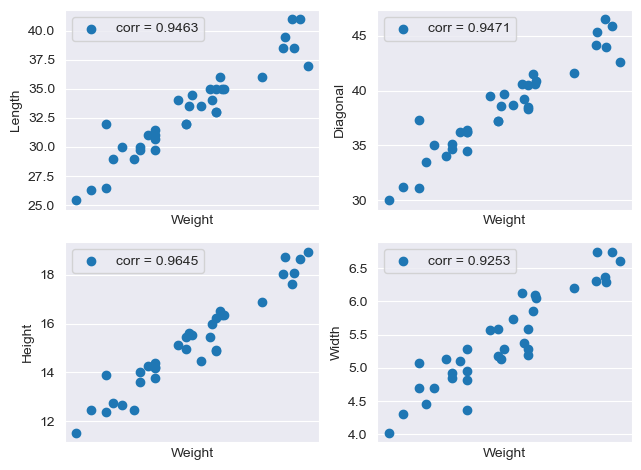

In [135]:
print_feature(2,2,dataDF,dataDF.columns[0],dataDF.columns[1:])

3. 학습 준비<hr>
- 학습 알고리즘 : 양의 선형관계 파악됨 => 선형 모델
- 학습 데이터 준비 : 피처-타겟 분리, 학습용 데이터셋 - 테스트용 데이터셋
- 피쳐 값의 범위 비교 : 작은 범위 최대값 8 ~ 큰 범위 최대값 50 => 피쳐 스케일링

(3-1) 학습 데이터 분리 => 피쳐-타겟 학습용 데이터셋 - 테스트용 데이터셋

In [136]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,minmax_scale,robust_scale

In [137]:
# 피쳐와 타겟 분리
featureDF = dataDF[dataDF.columns[1:]]
targetSR = dataDF[dataDF.columns[0]]

In [138]:
# 데이터셋 준비 => 70:30
xtrain,xtest,ytrain,ytest = train_test_split(featureDF,targetSR,random_state=7, test_size=0.3)
xtrain.shape, xtest.shape

((24, 4), (11, 4))

(3-2) 피쳐 스케일링

In [140]:
std_scaler = StandardScaler()
std_scaler.fit(xtrain)

mm_scaler = MinMaxScaler()
mm_scaler.fit(xtrain)

ro_scaler = RobustScaler()
ro_scaler.fit(xtrain)

RobustScaler()

In [141]:
# 3가지 버전에 스케일된 데이터셋 준비
std_xtrain = std_scaler.transform(xtrain)
std_xtest = std_scaler.transform(xtest)

mm_xtrain = mm_scaler.transform(xtrain)
mm_xtest = mm_scaler.transform(xtest)

rb_xtrain = ro_scaler.transform(xtrain)
rb_xtest = ro_scaler.transform(xtest)

(4) 학습 진행 <hr>

In [142]:
from sklearn.linear_model import LinearRegression
## 잘했어 !!! good!!

In [143]:

model = LinearRegression()
model.fit(std_xtrain,ytrain)

print(f'[모델 파라미터] \ncoef_ : {model.coef_}\nintercept_ : {model.intercept_}')

# 수식 : coef_ 개수는 피쳐 개수와 동일
print(f'y = {model.coef_[0]:.2f}*{xtrain.columns[0]} + {model.coef_[1]:.2f}*{xtrain.columns[1]} + {model.coef_[2]:.2f}*{xtrain.columns[2]} + {model.coef_[3]:.2f}*{xtrain.columns[3]} + {model.intercept_:.2f}')



[모델 파라미터] 
coef_ : [  5.81124146  56.71151617 108.02781251  28.46942271]
intercept_ : 633.9583333333335
y = 5.81*Length + 56.71*Diagonal + 108.03*Height + 28.47*Width + 633.96


5. 모델 평가
- 훈련용 데이터셋의 점수와 테스트 데이터셋 점수 비교
- 1) 훈련 점수 > 테스트 점수 : 과대적합
- 2) 훈련 점수 ▼, 테스트 점수 ▼ : 과소적합
- 3) 훈련 점수 늑 테스트 점수 : 최적적합

In [147]:
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_error

In [179]:
def find_model(xtrain, ytrain, xtest, ytest):
    
    models = [LinearRegression()]
    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    acDict = {}
    for model in models:
        for scaler in scalers:
            
            scaler.fit(xtrain)
            scaled_xtrain = scaler.transform(xtrain)
            scaled_xtest = scaler.transform(xtest)
            
            model.fit(scaled_xtrain, ytrain)
            print(f'model : {model}')
    
            train_score = model.score(scaled_xtrain,ytrain)
            test_score = model.score(scaled_xtest,ytest)
            print(f'scaler : {scaler}\nTrain score : {train_score}\nTest score : {test_score}') 
            
            y_pre = model.predict(scaled_xtest)
            r2 = r2_score(ytest,y_pre)
            mse = mean_squared_error(ytest, y_pre)
            mae = mean_absolute_error(ytest,y_pre)
            rmse = mean_squared_error(ytest, y_pre, squared=False)
            print(f'''
    [모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\n--------------------------------------
    ''')
            
            acDict[(model,scaler)] = [r2,mae,mse,rmse]
            
    max_ac = max(acDict, key=lambda k: acDict[k][0])
    print(f'[최적의 모델] :{max_ac}\n R2 : {acDict[max_ac][0]}\n MAE : {acDict[max_ac][1]}\n MSE : {acDict[max_ac][2]}\n RMSE : {acDict[max_ac][3]}')

In [188]:
def scalerType(xtrain, ytrain, xtest, ytest, model):

    scalers = [StandardScaler(), MinMaxScaler(), RobustScaler()]
    
    train_scores = []
    test_scores = []
    for scaler in scalers:
        
        scaler.fit(xtrain)
        scaled_xtrain = scaler.transform(xtrain)
        scaled_xtest = scaler.transform(xtest)
        
        model.fit(scaled_xtrain, ytrain)
        print(f'model : {model}')

        train_score = model.score(scaled_xtrain,ytrain)
        test_score = model.score(scaled_xtest,ytest)
        train_scores.append(train_score)
        test_scores.append(test_score)
        print(f'scaler : {scaler}\nTrain score : {train_score}\nTest score : {test_score}') 
        
        y_pre = model.predict(scaled_xtest)
        r2 = r2_score(ytest,y_pre)
        mse = mean_squared_error(ytest, y_pre)
        mae = mean_absolute_error(ytest,y_pre)
        rmse = mean_squared_error(ytest, y_pre, squared=False)
        print(f'''
[모델 설명도]\nR2 : {r2}\n[에러]\nMAE : {mae}\nMSE : {mse}\nRMSE : {rmse}\n\n--------------------------------------
''')

In [189]:
scalerType(xtrain,ytrain,xtest,ytest, LinearRegression())

model : LinearRegression()
scaler : StandardScaler()
Train score : 0.9546390373777777
Test score : 0.9064944670000151

[모델 설명도]
R2 : 0.9064944670000151
[에러]
MAE : 44.87106263853371
MSE : 4356.1214009992955
RMSE : 66.00091969813221

--------------------------------------

model : LinearRegression()
scaler : MinMaxScaler()
Train score : 0.9546390373777777
Test score : 0.9064944670000149

[모델 설명도]
R2 : 0.9064944670000149
[에러]
MAE : 44.87106263853378
MSE : 4356.121400999305
RMSE : 66.00091969813228

--------------------------------------

model : LinearRegression()
scaler : RobustScaler()
Train score : 0.9546390373777777
Test score : 0.9064944670000151

[모델 설명도]
R2 : 0.9064944670000151
[에러]
MAE : 44.871062638533715
MSE : 4356.1214009992955
RMSE : 66.00091969813221

--------------------------------------
